<a href="https://colab.research.google.com/github/Piyush86kumar/Cat-vs-Dogs-Classification-/blob/main/SMS_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('spam.csv', encoding = 'latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.sample(15)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
996,ham,Yetunde i'm in class can you not run water on ...,NaN,NaN,NaN
3790,spam,"Twinks, bears, scallies, skins and jocks are c...",NaN,NaN,NaN
2021,ham,"I don't have anybody's number, I still haven't...",NaN,NaN,NaN
5162,ham,Just send a text. We'll skype later.,NaN,NaN,NaN
4471,spam,3. You have received your mobile content. Enjoy,NaN,NaN,NaN
5163,ham,Ok leave no need to ask,NaN,NaN,NaN
317,ham,"Not really dude, have no friends i'm afraid :(",NaN,NaN,NaN
134,spam,Want 2 get laid tonight? Want real Dogging loc...,NaN,NaN,NaN
4028,ham,"[Û_] anyway, many good evenings to u! s",NaN,NaN,NaN
977,ham,Dont hesitate. You know this is the second tim...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last 3 columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [7]:
df.sample(5)


,v1,v2
5386,ham,I'm at work. Please call
3118,ham,Stop knowing me so well!
4497,spam,Latest Nokia Mobile or iPOD MP3 Player +å£400 ...
2730,ham,I havent lei.. Next mon can?
962,ham,"Watching cartoon, listening music &amp; at eve..."


In [8]:
#renaming the columns
df.rename(columns = {'v1' : 'Target', 'v2' : 'Text'}, inplace = True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#converting Target column into classification using numbers

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Target'] = encoder.fit_transform(df['Target'])

In [10]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# checking missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
# check for duplicate values
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Target,Text
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...
5535,0,"I know you are thinkin malaria. But relax, chi..."
5539,0,Just sleeping..and surfing
5553,0,Hahaha..use your brain dear


In [14]:
df = df.drop_duplicates(keep = 'first')

In [15]:
#EDA
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

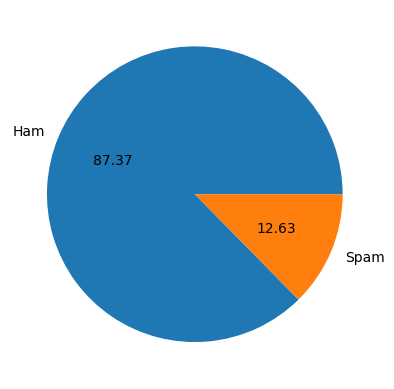

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels = ['Ham', 'Spam'], autopct = "%0.2f")
plt.show()

In [17]:
# data is imbalanced

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
#number of characters in each row
df['num_characters'] = df['Text'].apply(len)

In [20]:
df['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [21]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#number of words
df['num_words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['Target'] == 0][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['Target'] == 1][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

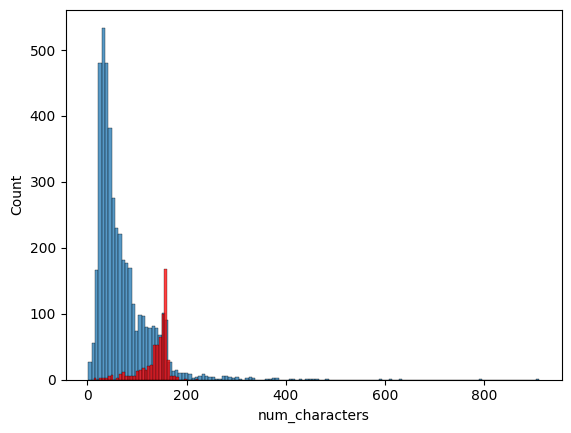

In [29]:
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

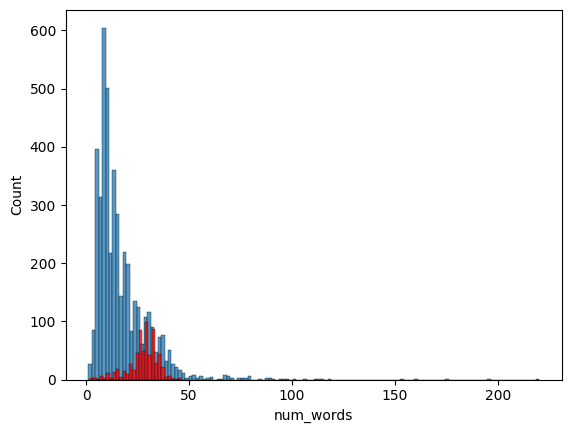

In [30]:
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'], color = 'red')

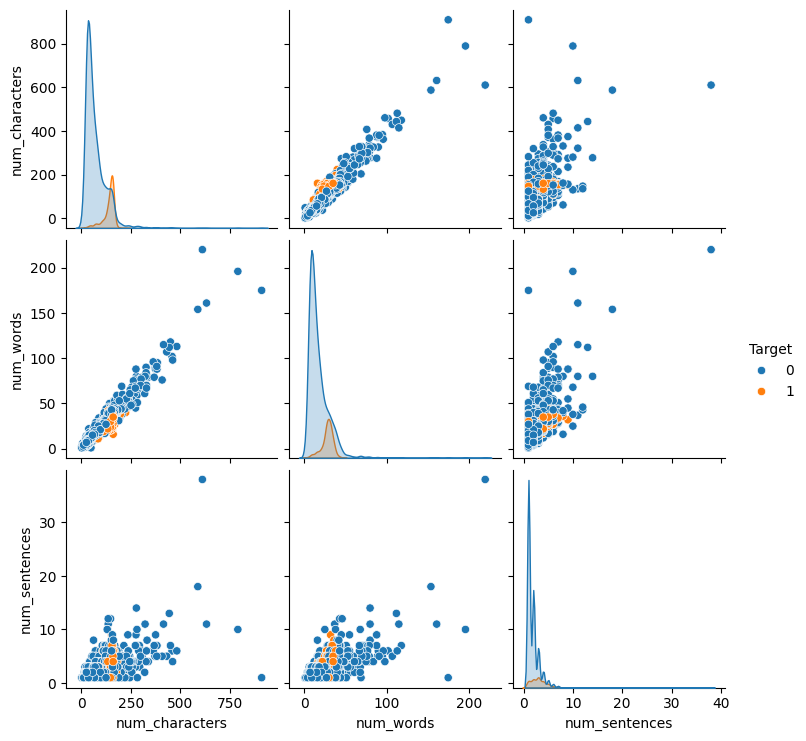

In [31]:
sns.pairplot(df, hue = 'Target')

In [32]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
#finding corelation bw varioud columns.
#Note : this fucntion does not work with string values
correlation = df[['Target','num_characters','num_words','num_sentences','num_characters']].corr()

<Axes: >

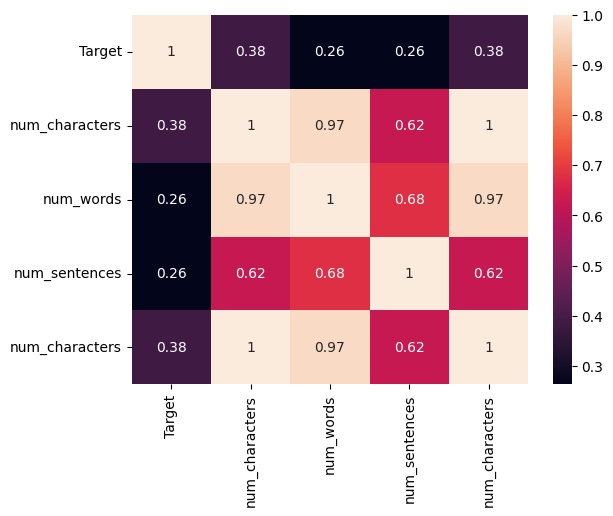

In [34]:
sns.heatmap(correlation, annot = True)

In [35]:
#Data Preprocessing
# 1. Lower case
# 2. Tokenization
# 3. Removing special characters
# 4. Removing stop words and punctuation
# 5. Stemming

In [36]:
 nltk.download('stopwords')
 from nltk.corpus import stopwords
 stopwords.words('english')

 import string
 from nltk.stem.porter import PorterStemmer
 ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
 def transform_text(text) :
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [38]:
transform_text(" I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [39]:
df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [40]:
#view details at any particular row of list/df
df.iloc[10]

Target                                                            0
Text              I'm gonna be home soon and i don't want to tal...
num_characters                                                  109
num_words                                                        28
num_sentences                                                     2
Name: 10, dtype: object

In [41]:
#view details at a particular row of the column 'Text'
transform_text(df['Text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
df['Transformed_data'] = df['Text'].apply(transform_text)

In [43]:
df.sample(10)

,Target,Text,num_characters,num_words,num_sentences,Transformed_data
705,0,I don't think I can get away for a trek that l...,76,19,1,think get away trek long famili town sorri
3988,0,Ok lor. Anyway i thk we cant get tickets now c...,133,34,4,ok lor anyway thk cant get ticket co like quit...
4802,0,How do you plan to manage that,30,7,1,plan manag
53,0,Wow. I never realized that you were so embaras...,291,69,6,wow never realiz embarass accomod thought like...
5505,0,What i told before i tell. Stupid hear after i...,127,30,4,told tell stupid hear wont tell anyth dad call...
4739,0,"I keep seeing weird shit and bein all \woah\"" ...",105,25,1,keep see weird shit bein realis actual reason
1763,0,Joy's father is John. Then John is the NAME of...,67,17,3,joy father john john name joy father mandan
3118,0,Stop knowing me so well!,24,6,1,stop know well
3211,0,We got a divorce. Lol. She.s here,33,9,3,got divorc lol
4391,0,what are your new years plans?,30,7,1,new year plan


In [44]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

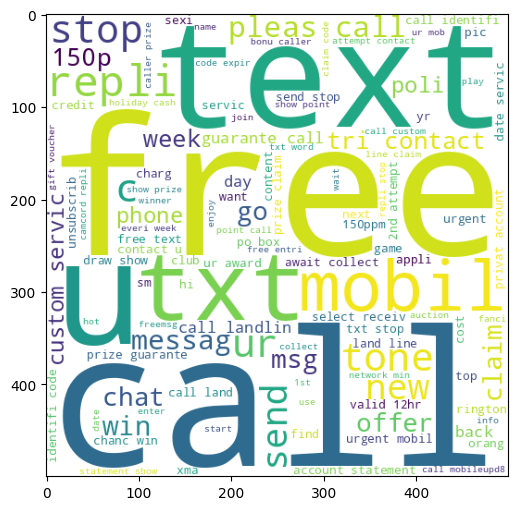

In [45]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_data'].str.cat(sep=" "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

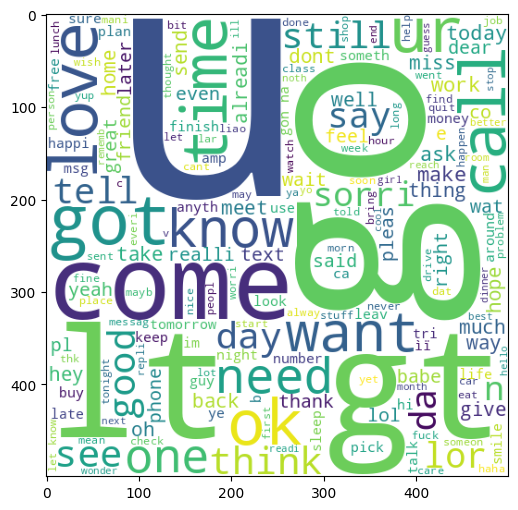

In [46]:
ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_data'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [47]:
spam_corpus  = []
for msg in df[df['Target'] == 1]['Transformed_data'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [48]:
len(spam_corpus)

9939

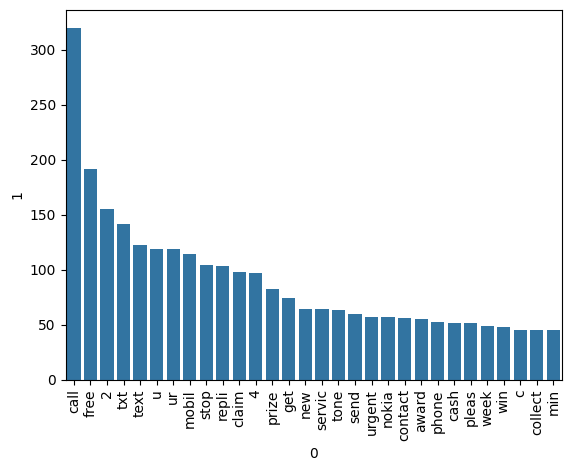

In [49]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y =pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [50]:
ham_corpus = []
for msg in df[df['Target'] == 0]['Transformed_data'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

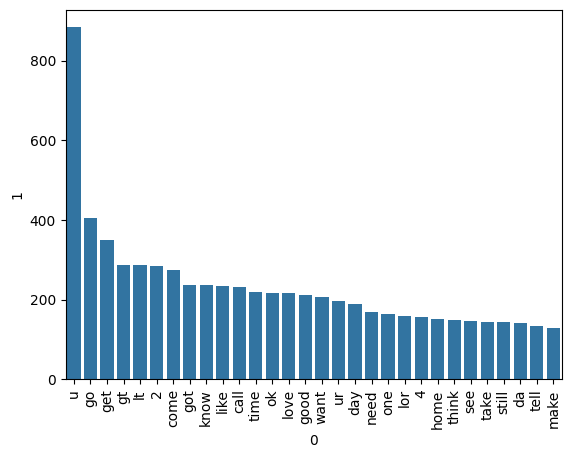

In [51]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y =pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [164]:
# Model Building
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

Evaluating different models , feature extration methods to find an optimal performing model

In [53]:
X1 = cv.fit_transform(df['Transformed_data']).toarray()

In [54]:
X1.shape

(5169, 6708)

In [55]:
Y1 = df['Target'].values

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,Y_train, Y_test = train_test_split(X1,Y1,test_size = 0.2, random_state = 2)

In [58]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(X_train, Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, y_pred1))
print(confusion_matrix(Y_test, y_pred1))
print(precision_score(Y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [61]:
mnb.fit(X_train, Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [62]:
bnb.fit(X_train, Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test, y_pred3))
print(precision_score(Y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [214]:
X2 = tfidf.fit_transform(df['Transformed_data']).toarray()

In [215]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X2)'''

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX2 = scaler.fit_transform(X2)'

In [216]:
#appending the num_characters col to X2
#X2 = np.hstack((X2,df['num_characters'].values.reshape(-1,1)))

In [217]:
X2.shape

(5169, 3000)

In [218]:
Y2 = df['Target'].values

In [219]:
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2, test_size = 0.2, random_state = 2)

In [220]:
gnb.fit(X2_train,Y2_train)
y2_pred1 = gnb.predict(X2_test)
print(accuracy_score(Y2_test, y2_pred1))
print(confusion_matrix(Y2_test, y2_pred1))
print(precision_score(Y2_test, y2_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [221]:
mnb.fit(X2_train,Y2_train)
y2_pred2 = mnb.predict(X2_test)
print(accuracy_score(Y2_test, y2_pred2))
print(confusion_matrix(Y2_test, y2_pred2))
print(precision_score(Y2_test, y2_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [222]:
bnb.fit(X2_train,Y2_train)
y2_pred3 = bnb.predict(X2_test)
print(accuracy_score(Y2_test, y2_pred3))
print(confusion_matrix(Y2_test, y2_pred3))
print(precision_score(Y2_test, y2_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [240]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth = 5)
mnb = MultinomialNB()
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [225]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
    }

In [226]:
def train_classifier(clf, X_train, Y_train, X_test, Y_test):
  clf.fit(X_train,Y_train)
  Y_pred = clf.predict(X_test)
  accuracy = accuracy_score(Y_test, Y_pred)
  precision = precision_score(Y_test, Y_pred)

  return accuracy, precision

In [227]:
train_classifier(mnb,X2_train,Y2_train,X2_test, Y2_test)

(0.9709864603481625, 1.0)

In [228]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf,X2_train,Y2_train, X2_test, Y2_test)

  print("For",name)
  print("Accracy - ", current_accuracy)
  print("Precision - ", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accracy -  0.9758220502901354
Precision -  0.9747899159663865
For KN
Accracy -  0.9052224371373307
Precision -  1.0
For NB
Accracy -  0.9709864603481625
Precision -  1.0
For DT
Accracy -  0.9303675048355899
Precision -  0.8173076923076923
For LR
Accracy -  0.9584139264990329
Precision -  0.9702970297029703
For RF
Accracy -  0.9758220502901354
Precision -  0.9829059829059829
For AdaBoost
Accracy -  0.960348162475822
Precision -  0.9292035398230089
For BgC
Accracy -  0.9584139264990329
Precision -  0.8682170542635659
For ETC
Accracy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accracy -  0.9468085106382979
Precision -  0.9191919191919192
For xgb
Accracy -  0.9671179883945842
Precision -  0.9262295081967213


In [229]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending = False)

In [230]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [231]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [232]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


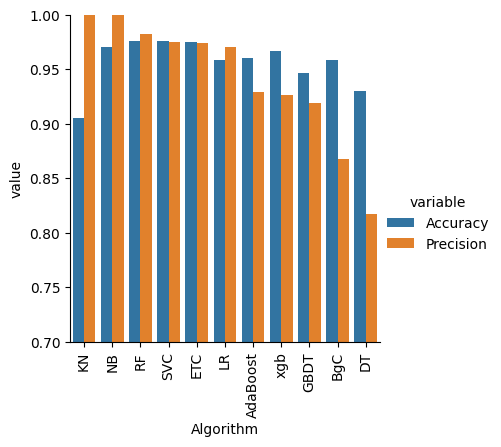

In [233]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height = 4)
plt.ylim(0.7, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

Model Optimization
1. Change the max_features parameter for Tfidf , max features = 3000
2. Scaling the values of X2 (not effective)
3. Appending the num_characters to X2 (not effective)
4. Voting Classifier (not much effective- losing precision)
5. stacking


In [179]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_max_ft_3000' : accuracy_scores, 'Precision_max_tf_3000' : precision_scores}).sort_values('Precision_max_tf_3000',ascending = False)
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_tf_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [180]:
new_df = performance_df.merge(temp_df, on = 'Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_tf_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217


In [194]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_scaling' : accuracy_scores, 'Precision_scaling' : precision_scores}).sort_values('Precision_scaling', ascending = False)
temp_df

,Algorithm,Accuracy_scaling,Precision_scaling
5,RF,0.975822,0.982906
1,KN,0.905222,0.976190
8,ETC,0.974855,0.974576
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
6,AdaBoost,0.960348,0.929204
0,SVC,0.969052,0.927419
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [196]:
new_df_scaled = new_df.merge(temp_df, on = 'Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_tf_3000,Accuracy_scaling,Precision_scaling
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217


In [212]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_num_char' : accuracy_scores, 'Precision_accuracy' : precision_scores})
temp_df

,Algorithm,Accuracy_num_char,Precision_accuracy
0,SVC,0.866538,0.000000
1,KN,0.885880,0.833333
2,NB,0.973888,0.951220
3,DT,0.945841,0.886792
4,LR,0.965184,0.955357
5,RF,0.969052,0.981818
6,AdaBoost,0.964217,0.931624
7,BgC,0.966151,0.899225
8,ETC,0.978723,0.975410
9,GBDT,0.951644,0.931373


In [213]:
new_df_scaled = new_df_scaled.merge(temp_df, on = 'Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_tf_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_char,Precision_accuracy
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.885880,0.833333
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.973888,0.951220
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.969052,0.981818
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.978723,0.975410
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419,0.866538,0.000000
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.964217,0.931624
6,xgb,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230,0.969052,0.941667
7,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286,0.965184,0.955357
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192,0.951644,0.931373
9,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.966151,0.899225


In [234]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

In [249]:
voting = VotingClassifier(estimators = [('svm',svc) , ('nb',mnb), ('et',etc),], voting = 'soft')

In [250]:
voting.fit(X2_train,Y2_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [251]:
y_pred = voting.predict(X2_test)
print("Accuracy", accuracy_score(Y2_test, y_pred))
print("Precision", precision_score(Y2_test, y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [256]:
#Apply stacking
#estimator = [('svm',svc) , ('nb',mnb), ('et',etc),]
#final_estimator = RandomForestClassifier()

In [257]:
from sklearn.ensemble import StackingClassifier

In [259]:
clf = StackingClassifier(estimators = ([('svm',svc) , ('nb',mnb), ('et',etc),]), final_estimator =RandomForestClassifier())

In [263]:
clf.fit(X2_train, Y2_train)


StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [262]:
y_pred = clf.predict(X2_test)
print("Accuracy", accuracy_score(Y2_test, y_pred))
print("Precision", precision_score(Y2_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [264]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb,open('model.pkl','wb'))